In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pyvis import network as net
from IPython.display import display,HTML


def basic_info(G):
    info= pd.DataFrame({'Radio': nx.radius(G), 'Diámetro': nx.diameter(G), 'Centro':str(nx.center(G)).replace('[','').replace(']','').replace("'",''),
               'Periferia':str(nx.periphery(G)).replace('[','').replace(']','').replace("'",''), 'Is_connected':nx.is_connected(G),'Is_weighted':nx.is_weighted(G),
               'Degree_assortativity_coefficient': nx.degree_assortativity_coefficient(G)
    },index=[0])

    return info

def nodes_info(G):
    info=pd.DataFrame((nx.eccentricity(G),
    nx.clustering(G),
    nx.betweenness_centrality(G)),index=['Eccentricity','Clustering','Betweenness']
    ).transpose() 

    return info

## Creating a graph by hand


### The Zachary Karate Club

In [ ]:

# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph, with the "club" attribute indicating which group they belong to
G.add_nodes_from([
    ( 0 , {'club': 'Mr. Hi', 'Country': "Cuba"} ),
    ( 1 , {'club': 'Mr. Hi', 'Country': "China"} ),
    ( 2 , {'club': 'Mr. Hi'} ),
    ( 3 , {'club': 'Mr. Hi'} ),
    ( 4 , {'club': 'Mr. Hi'} ),
    ( 5 , {'club': 'Mr. Hi'} ),
    ( 6 , {'club': 'Mr. Hi'} ),
    ( 7 , {'club': 'Mr. Hi'} ),
    ( 8 , {'club': 'Mr. Hi'} ),
    ( 9 , {'club': 'Officer'} ),
    ( 10 , {'club': 'Mr. Hi'} ),
    ( 11 , {'club': 'Mr. Hi'} ),
    ( 12 , {'club': 'Mr. Hi'} ),
    ( 13 , {'club': 'Mr. Hi'} ),
    ( 14 , {'club': 'Officer'} ),
    ( 15 , {'club': 'Officer'} ),
    ( 16 , {'club': 'Mr. Hi'} ),
    ( 17 , {'club': 'Mr. Hi'} ),
    ( 18 , {'club': 'Officer'} ),
    ( 19 , {'club': 'Mr. Hi'} ),
    ( 20 , {'club': 'Officer'} ),
    ( 21 , {'club': 'Mr. Hi'} ),
    ( 22 , {'club': 'Officer'} ),
    ( 23 , {'club': 'Officer'} ),
    ( 24 , {'club': 'Officer'} ),
    ( 25 , {'club': 'Officer'} ),
    ( 26 , {'club': 'Officer'} ),
    ( 27 , {'club': 'Officer'} ),
    ( 28 , {'club': 'Officer'} ),
    ( 29 , {'club': 'Officer'} ),
    ( 30 , {'club': 'Officer'} ),
    ( 31 , {'club': 'Officer'} ),
    ( 32 , {'club': 'Officer'} ),
    ( 33 , {'club': 'Officer'} )
])

# Add edges to the graph
G.add_edges_from([
    (0, 1) ,
    (0, 2) ,
    (0, 3) ,
    (0, 4) ,
    (0, 5) ,
    (0, 6) ,
    (0, 7) ,
    (0, 8) ,
    (0, 10) ,
    (0, 11) ,
    (0, 12) ,
    (0, 13) ,
    (0, 17) ,
    (0, 19) ,
    (0, 21) ,
    (0, 31) ,
    (1, 2) ,
    (1, 3) ,
    (1, 7) ,
    (1, 13) ,
    (1, 17) ,
    (1, 19) ,
    (1, 21) ,
    (1, 30) ,
    (2, 3) ,
    (2, 7) ,
    (2, 8) ,
    (2, 9) ,
    (2, 13) ,
    (2, 27) ,
    (2, 28) ,
    (2, 32) ,
    (3, 7) ,
    (3, 12) ,
    (3, 13) ,
    (4, 6) ,
    (4, 10) ,
    (5, 6) ,
    (5, 10) ,
    (5, 16) ,
    (6, 16) ,
    (8, 30) ,
    (8, 32) ,
    (8, 33) ,
    (9, 33) ,
    (13, 33) ,
    (14, 32) ,
    (14, 33) ,
    (15, 32) ,
    (15, 33) ,
    (18, 32) ,
    (18, 33) ,
    (19, 33) ,
    (20, 32) ,
    (20, 33) ,
    (22, 32) ,
    (22, 33) ,
    (23, 25) ,
    (23, 27) ,
    (23, 29) ,
    (23, 32) ,
    (23, 33) ,
    (24, 25) ,
    (24, 27) ,
    (24, 31) ,
    (25, 31) ,
    (26, 29) ,
    (26, 33) ,
    (27, 33) ,
    (28, 31) ,
    (28, 33) ,
    (29, 32) ,
    (29, 33) ,
    (30, 32) ,
    (30, 33) ,
    (31, 32) ,
    (31, 33) ,
    (32, 33) 
])

### Nodes and number of nodes

In [ ]:
G.nodes

In [ ]:
G.has_node(4)

In [ ]:
G.has_node(50)

#### Python details: NodeView is a data structure in Networkx

In [ ]:
# You can iterate over it
for n in G.nodes:
    print(" ",n)

In [ ]:
## You can cast it to other simliar data structures
np.array(G.nodes)

In [ ]:
list(G.nodes)

In [ ]:
len(list(G.nodes))

### Before doing something yourself, ask if maybe it is already built in in the library

In [ ]:
G.number_of_nodes()

In [ ]:
G.__len__()

In [ ]:
G.nodes[2]

In [ ]:
G.edges

In [ ]:
G.degree

In [ ]:
ar = np.zeros(10)
for i in range(10):
    ar[i] = 2*i
ar

In [ ]:
node_color = ["red" if G.nodes[n]["club"] == "Mr. Hi" else "blue" for n in G.nodes()]
node_color

#### Plotting a graph

In [ ]:
# Set the node color based on the club attribute
node_color = ["red" if G.nodes[n]["club"] == "Mr. Hi" else "blue" for n in G.nodes()]

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True, node_color=node_color)

# Show the plot
plt.show()

### Same graph, from Networkx

In [ ]:

# Create the graph object
G = nx.karate_club_graph()


# Set the node color based on the club attribute
node_color = ["red" if G.nodes[n]["club"] == "Mr. Hi" else "blue" for n in G.nodes()]

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True, node_color=node_color)

#   -----  Try this if the previous give errors
#nx.draw_networkx(G, with_labels=True, node_color=node_color)

# Show the plot
plt.show()

In [ ]:
plt.plot(nx.degree_histogram(G))

## Drunken man graph

In [37]:
# Create an empty graph object
G = nx.MultiDiGraph()

# Add nodes to the graph, with the "club" attribute indicating which group they belong to
G.add_nodes_from([
    "Bed" ,
    "Bath"  ,
    "Living",
    "Kitch"
])

# Add edges to the graph
G.add_weighted_edges_from([
    ("Bed", "Bath",1) ,
    ("Bed" , "Living",0.2),
    ("Living",'Bed',0.5),
    ("Living", "Bath",0.1) ,
    ("Kitch" , "Living",0.8)
])

### Instead of completing previous data, try functions add_node and add_edge

In [ ]:
G.add_node(4 ) # Write the number of the missing node

In [ ]:
G.nodes

In [ ]:
G.add_edge(3,2)
G.add_edge(3,4)

In [ ]:
# tambien con una lista de edges
G.add_edges_from(  ( (3,2) , (3,4) )  )

In [ ]:
G.nodes

In [ ]:
G.edges

In [ ]:
G.has_edge('Bed','Bath')

In [ ]:
G.has_edge('Bath','Bed') # because it is un-directed. Directed graphs are created with  G = nx.DiGraph()

In [ ]:
for e in G.edges:
    print(e)

In [ ]:
for n in G.neighbors("Bed"):
    print(n)

### Draw

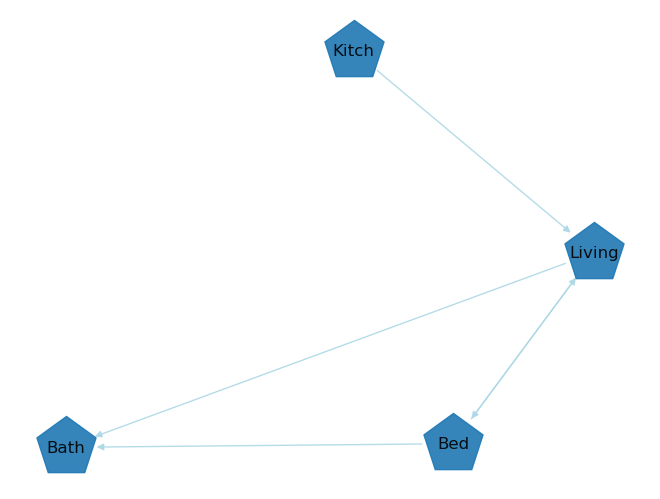

In [15]:
nx.draw(G, with_labels=True,node_size=2000,font_family='sans-serif',alpha=0.9,edge_color='lightblue',node_shape='p',cmap=list(nx.betweenness_centrality(G)))

# Show the plot
plt.show()

In [ ]:
pd.DataFrame({'Radio': nx.radius(G), 'Diámetro': nx.diameter(G), 'Centro':nx.center(G),
               'Periferia':str(nx.periphery(G)).replace('[','').replace(']','').replace("'",'')

})

In [ ]:
pd.DataFrame((nx.eccentricity(G),
nx.clustering(G),
nx.betweenness_centrality(G)),index=['Eccentricity','Clustering','Betweenness']
).transpose()

In [ ]:
nx.eccentricity(G)

### Adjacency Matrix

In [16]:
list(G.adjacency())

[('Bed', {'Bath': {0: {'weight': 1}}, 'Living': {0: {'weight': 0.2}}}),
 ('Bath', {}),
 ('Living', {'Bed': {0: {'weight': 0.5}}, 'Bath': {0: {'weight': 0.1}}}),
 ('Kitch', {'Living': {0: {'weight': 0.8}}})]

In [ ]:
for v in G.adjacency():
    print(v,"\n")
    
print(" -------------- ")
for v in G.adjacency():
    for u in v[1]:
        print(v[0]," connects to ",u,"\n")

In [25]:
A = nx.adjacency_matrix(G)
A


C:\Users\José Luis\AppData\Local\Temp\ipykernel_3388\337344559.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [26]:
Amat = np.zeros([4,4]) + A ## an empty matrix added to force conversion to 2D matrix
Amat    

matrix([[0. , 1. , 0.2, 0. ],
        [0. , 0. , 0. , 0. ],
        [0.5, 0.1, 0. , 0. ],
        [0. , 0. , 0.8, 0. ]])

### Compruebe que los exponentes de la matriz de adjacencia dan la cantidad de caminos 

In [32]:
Amat*Amat

matrix([[0.1 , 0.02, 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.5 , 0.1 , 0.  ],
        [0.4 , 0.08, 0.  , 0.  ]])

### Sparse matrices are kept memory efficient

In [ ]:
print(A)

In [ ]:
print("---- 1 step\n",A)
print("--- 2 steps \n",A*A)
print("--- 3 steps \n",A*A*A)

### Test this functions in Networkx

#### degree_histogram


In [ ]:
nx.degree_histogram(G)

## Les Miserables

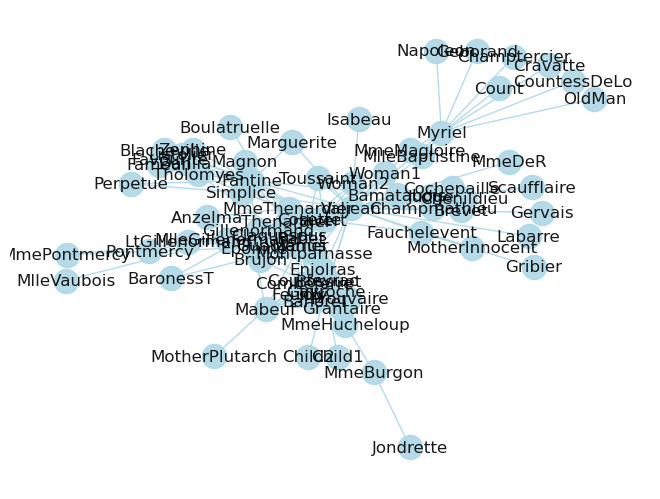

In [2]:
G = nx.les_miserables_graph()
# Set the node color based on the club attribute
#node_color = ["red" if G.nodes[n]["club"] == "Mr. Hi" else "blue" for n in G.nodes()]

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True,alpha=0.9,edge_color='lightblue',node_color='lightblue')

# Show the plot
plt.show()

### Basic info

In [ ]:
basic_info(G)

In [ ]:
NI=nodes_info(G)
NI

In [ ]:
NI[NI.Clustering==max(NI.Clustering)]

In [ ]:
NI[NI.Betweenness==max(NI.Betweenness)]

In [ ]:
plt.hist(nx.degree_histogram(G))

In [ ]:
nx.degree_pearson_correlation_coefficient(G)

In [ ]:

# Draw the graph with node color based on the club attribute
#nx.draw(G.subgraph(["Javert"]), with_labels=True)

nx.draw(G.subgraph(np.append(["Javert"],list(G.neighbors("Javert")))), with_labels=True)
plt.show()

In [ ]:
nx.draw(G.subgraph(list(nx.center(G))), with_labels=True)
plt.show()

In [ ]:
nx.draw(G.subgraph(list(nx.periphery(G))), with_labels=True)

### Adjacency

In [ ]:
A=np.zeros([G.number_of_nodes(),G.number_of_nodes()]) +  nx.adjacency_matrix(G)
A


In [ ]:
A.dot(A)==A*A

### 3D plot

In [ ]:


# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=18)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

In [3]:
nt = net.Network(height='1000px', width='1000px',notebook=True)
nt.from_nx(G)

#html=nt.generate_html()
#with open('nx.html', mode='w',encoding='utf-8') as f:
#    f.write(html)
display(nt.show('nx.html'))


In [33]:
import gravis as gv
nx.write_graphml(G,'nx.html')

gv.d3(G,use_edge_size_normalization=True,use_node_size_normalization=True,node_size_data_source='betweeness',node_size_normalization_min=10,edge_curvature=0.3,edge_size_data_source='weight')


In [ ]:
G = nx.davis_southern_women_graph()

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

In [ ]:
nt = net.Network(height='500px', width='900px',notebook=True,cdn_resources='remote')
#nt = Network('500px', '1500px')
nt.from_nx(G)
nt.show('nx.html')